
#**Suryakanta Karan (M22AIE207) m22aie207@iitj.ac.in**

#Q1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score
from torch.utils.tensorboard import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [2]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 5)
        self.fc2 = nn.Linear(5, 7)
        self.fc3 = nn.Linear(7, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x.float()))  # Convert input to float
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define custom dataset
class IrisDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.targets[idx]
        return x, y

In [3]:
# Load IRIS dataset
iris = load_iris()
data = iris.data
targets = iris.target

In [5]:
# Define cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True)

# Initialize Tensorboard writer
writer = SummaryWriter()

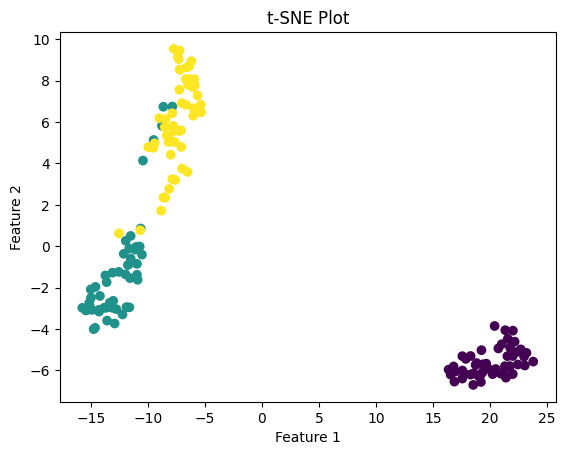

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


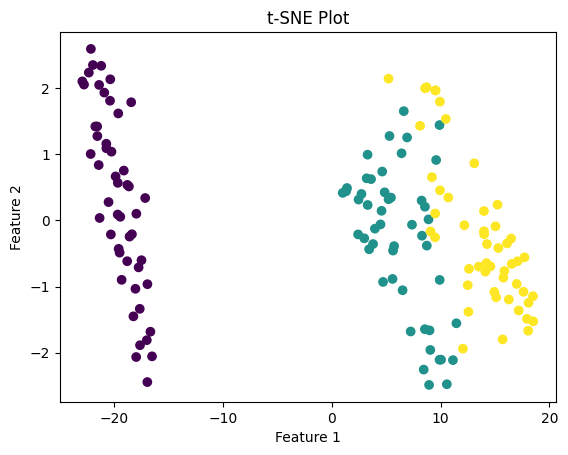

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


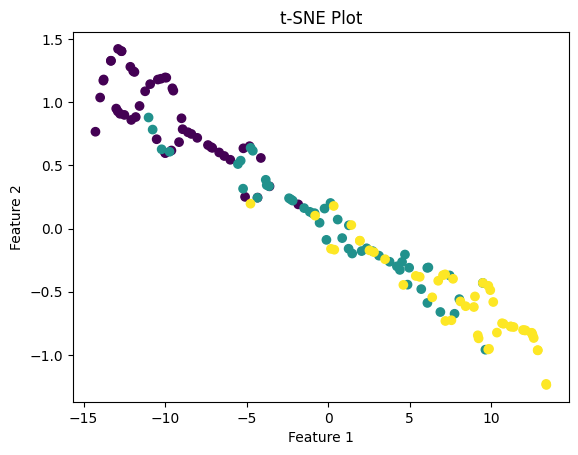

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


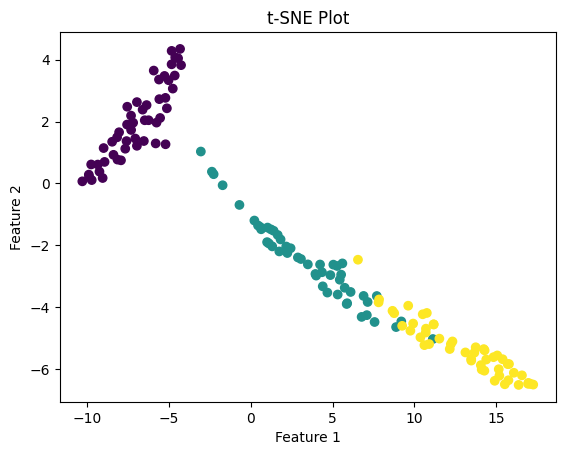

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


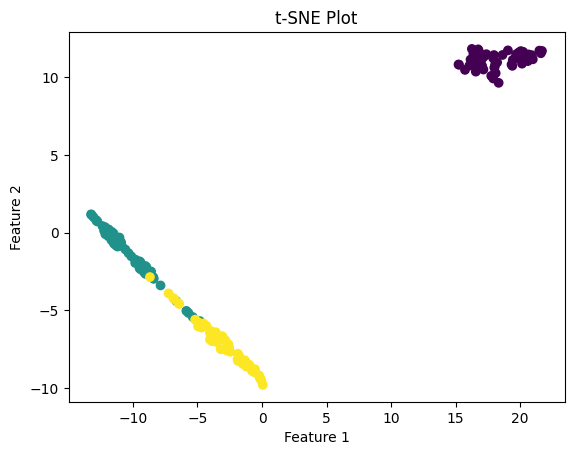

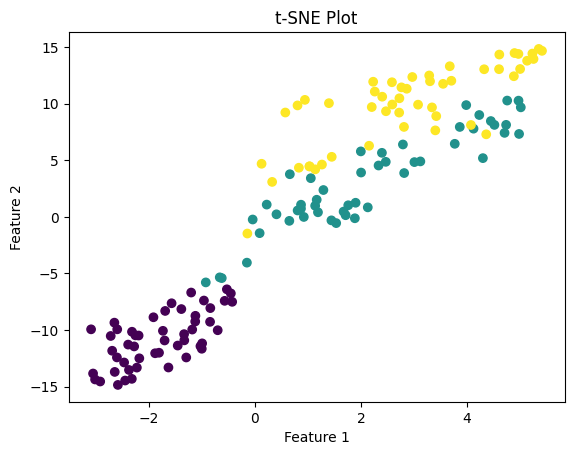

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


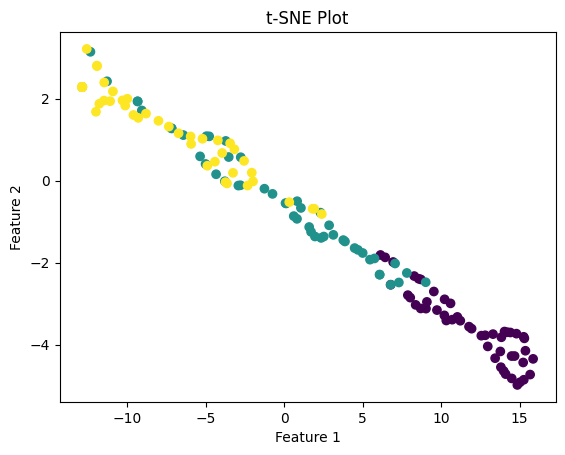

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


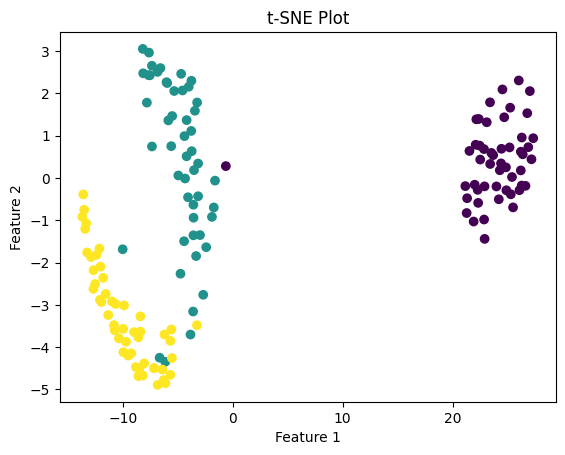

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


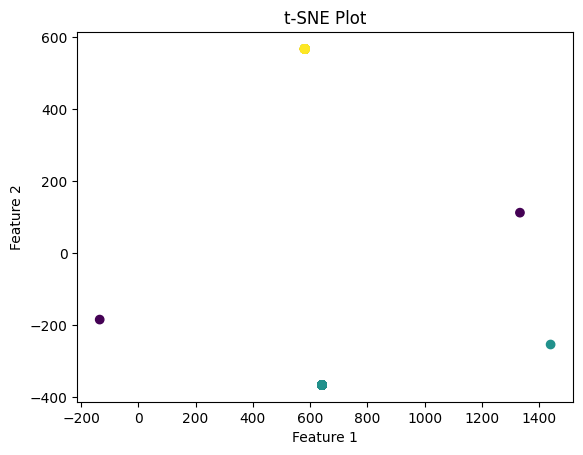

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


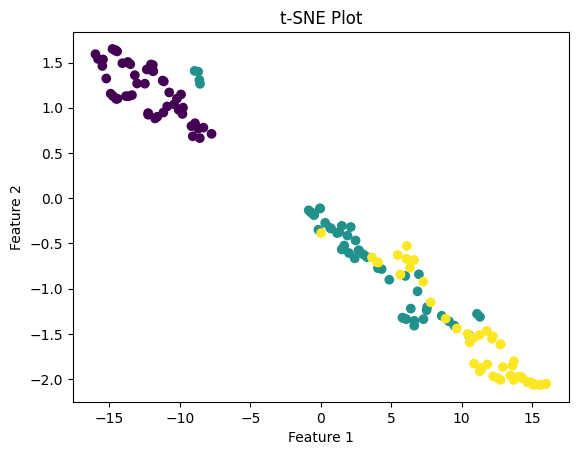

In [6]:
# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kfold.split(data)):
    # Split data into train and test sets
    train_data, test_data = data[train_index], data[test_index]
    train_targets, test_targets = targets[train_index], targets[test_index]

    # Create dataloaders for train and test sets
    train_dataset = IrisDataset(train_data, train_targets)
    test_dataset = IrisDataset(test_data, test_targets)
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize MLP model
    model = MLP()

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    for epoch in range(10):
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        writer.add_scalar('Training Loss', running_loss, epoch)

    # Evaluate the model
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    # Calculate performance metrics
    precision = precision_score(true_labels, predictions, average='macro')
    recall = recall_score(true_labels, predictions, average='macro')
    accuracy = accuracy_score(true_labels, predictions)

    # Log performance metrics to Tensorboard
    writer.add_scalar('Precision', precision, fold)
    writer.add_scalar('Recall', recall, fold)
    writer.add_scalar('Accuracy', accuracy, fold)

    # Generate t-SNE plot
    tsne = TSNE(n_components=2)
    features = model(torch.Tensor(data)).detach().numpy()
    tsne_features = tsne.fit_transform(features)
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=targets)
    plt.title('t-SNE Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Close Tensorboard writer
writer.close()